In [1]:
#les imports 
import numpy as np
import pandas as pd
#from pyspark.mllib.stat import Statistics 
from math import sqrt 
from pprint import pprint
from numpy import array
import os
import os.path as osp
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

%matplotlib inline

In [2]:
df = pd.read_excel('videos.xlsx')
df

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var369,Var370,Var371,Var372,Var373,Var374,Var375,Var376,Var377,ValueToPredict
0,0.960559,1,128.396,128.882,131.165,134.987,141.276,150.685,162.461,175.558,...,0.0,0.0,0.0,0,1,1,0,1,0,0
1,0.967718,1,130.570,131.761,134.931,139.505,146.144,155.248,165.785,177.635,...,0.0,0.0,0.0,0,0,1,0,1,0,0
2,0.967764,1,133.556,135.112,138.673,143.459,149.968,158.547,168.060,178.984,...,0.0,0.0,0.0,0,0,1,0,0,0,0
3,0.967476,1,133.655,135.297,138.947,143.793,150.387,159.030,168.500,179.326,...,0.0,0.0,0.0,0,0,1,0,1,0,0
4,0.967207,1,134.697,136.218,139.381,143.809,150.453,159.384,169.158,179.861,...,0.0,0.0,1.0,0,0,1,0,1,0,0
5,0.926923,1,132.950,134.273,137.166,141.190,147.634,156.538,166.913,178.410,...,0.0,0.0,1.0,0,0,1,0,1,0,0
6,0.956298,1,133.888,134.852,137.362,141.263,147.819,156.821,166.847,177.559,...,0.0,0.0,1.0,0,0,1,0,1,0,0
7,0.964108,1,125.991,126.097,127.710,130.744,136.416,145.268,156.365,168.947,...,0.0,0.0,1.0,0,0,1,0,1,0,0
8,0.960963,1,125.410,125.505,127.167,130.282,136.116,145.163,156.385,169.026,...,0.0,0.0,1.0,0,0,1,0,1,0,0
9,0.832839,1,124.507,124.787,126.477,129.547,135.376,144.130,155.003,166.909,...,0.0,0.0,1.0,0,0,1,0,1,0,0


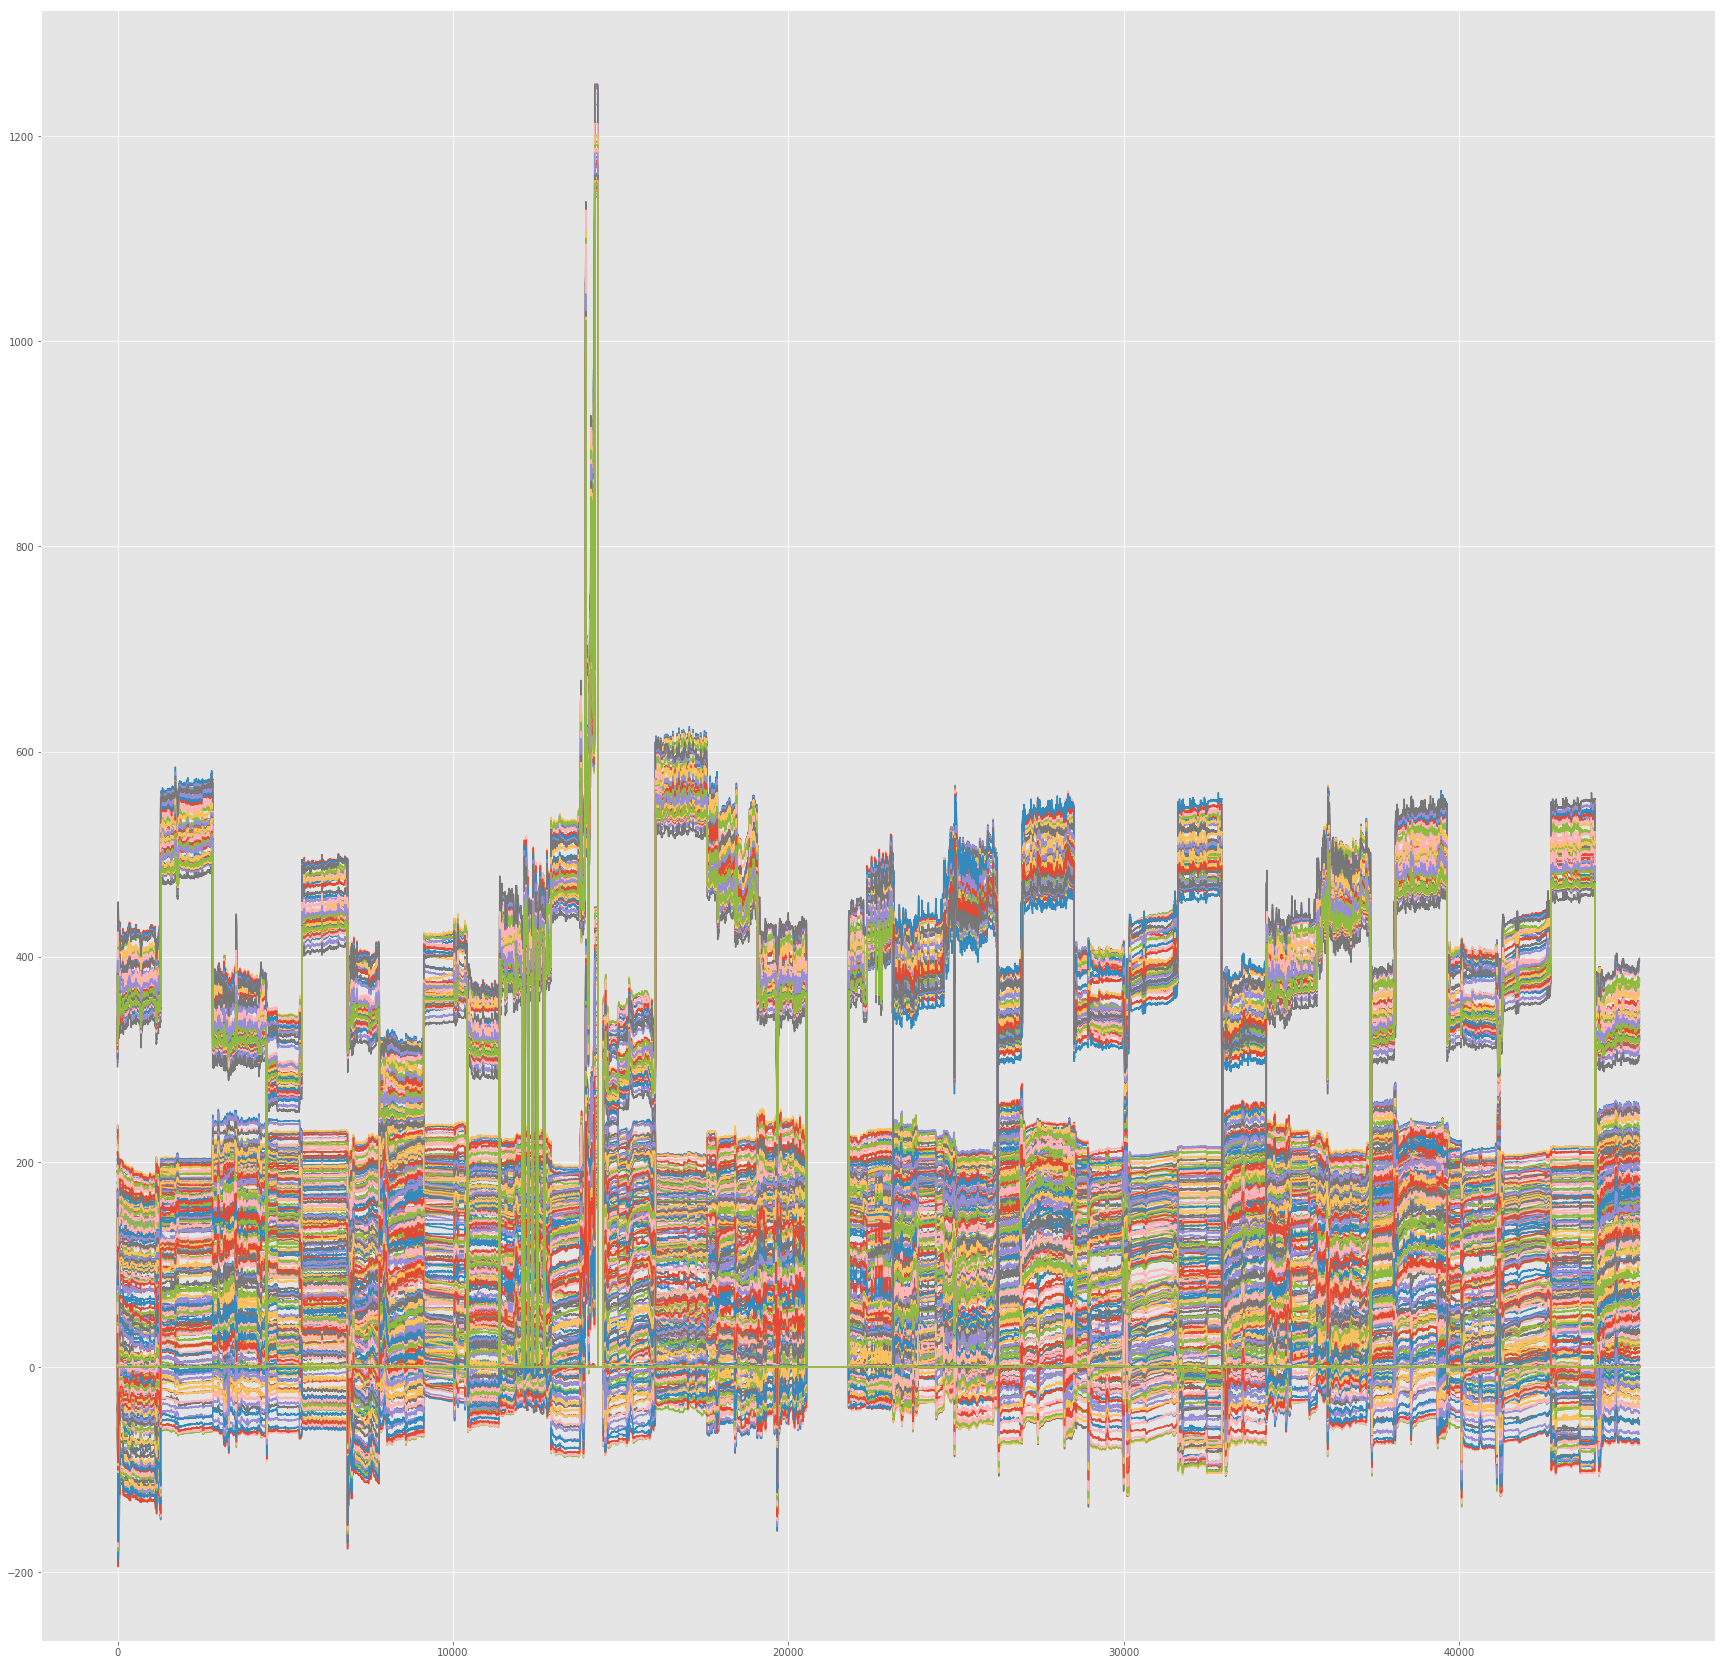

In [3]:
# copy of df  
# drop ValueToPredict
df_raw=df.copy()
df_raw.drop(['ValueToPredict'], axis = 1, inplace = True)
#df_raw.head()

# On affiche le nuage de points dont on dispose
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

plt.plot(df_raw)
plt.show()

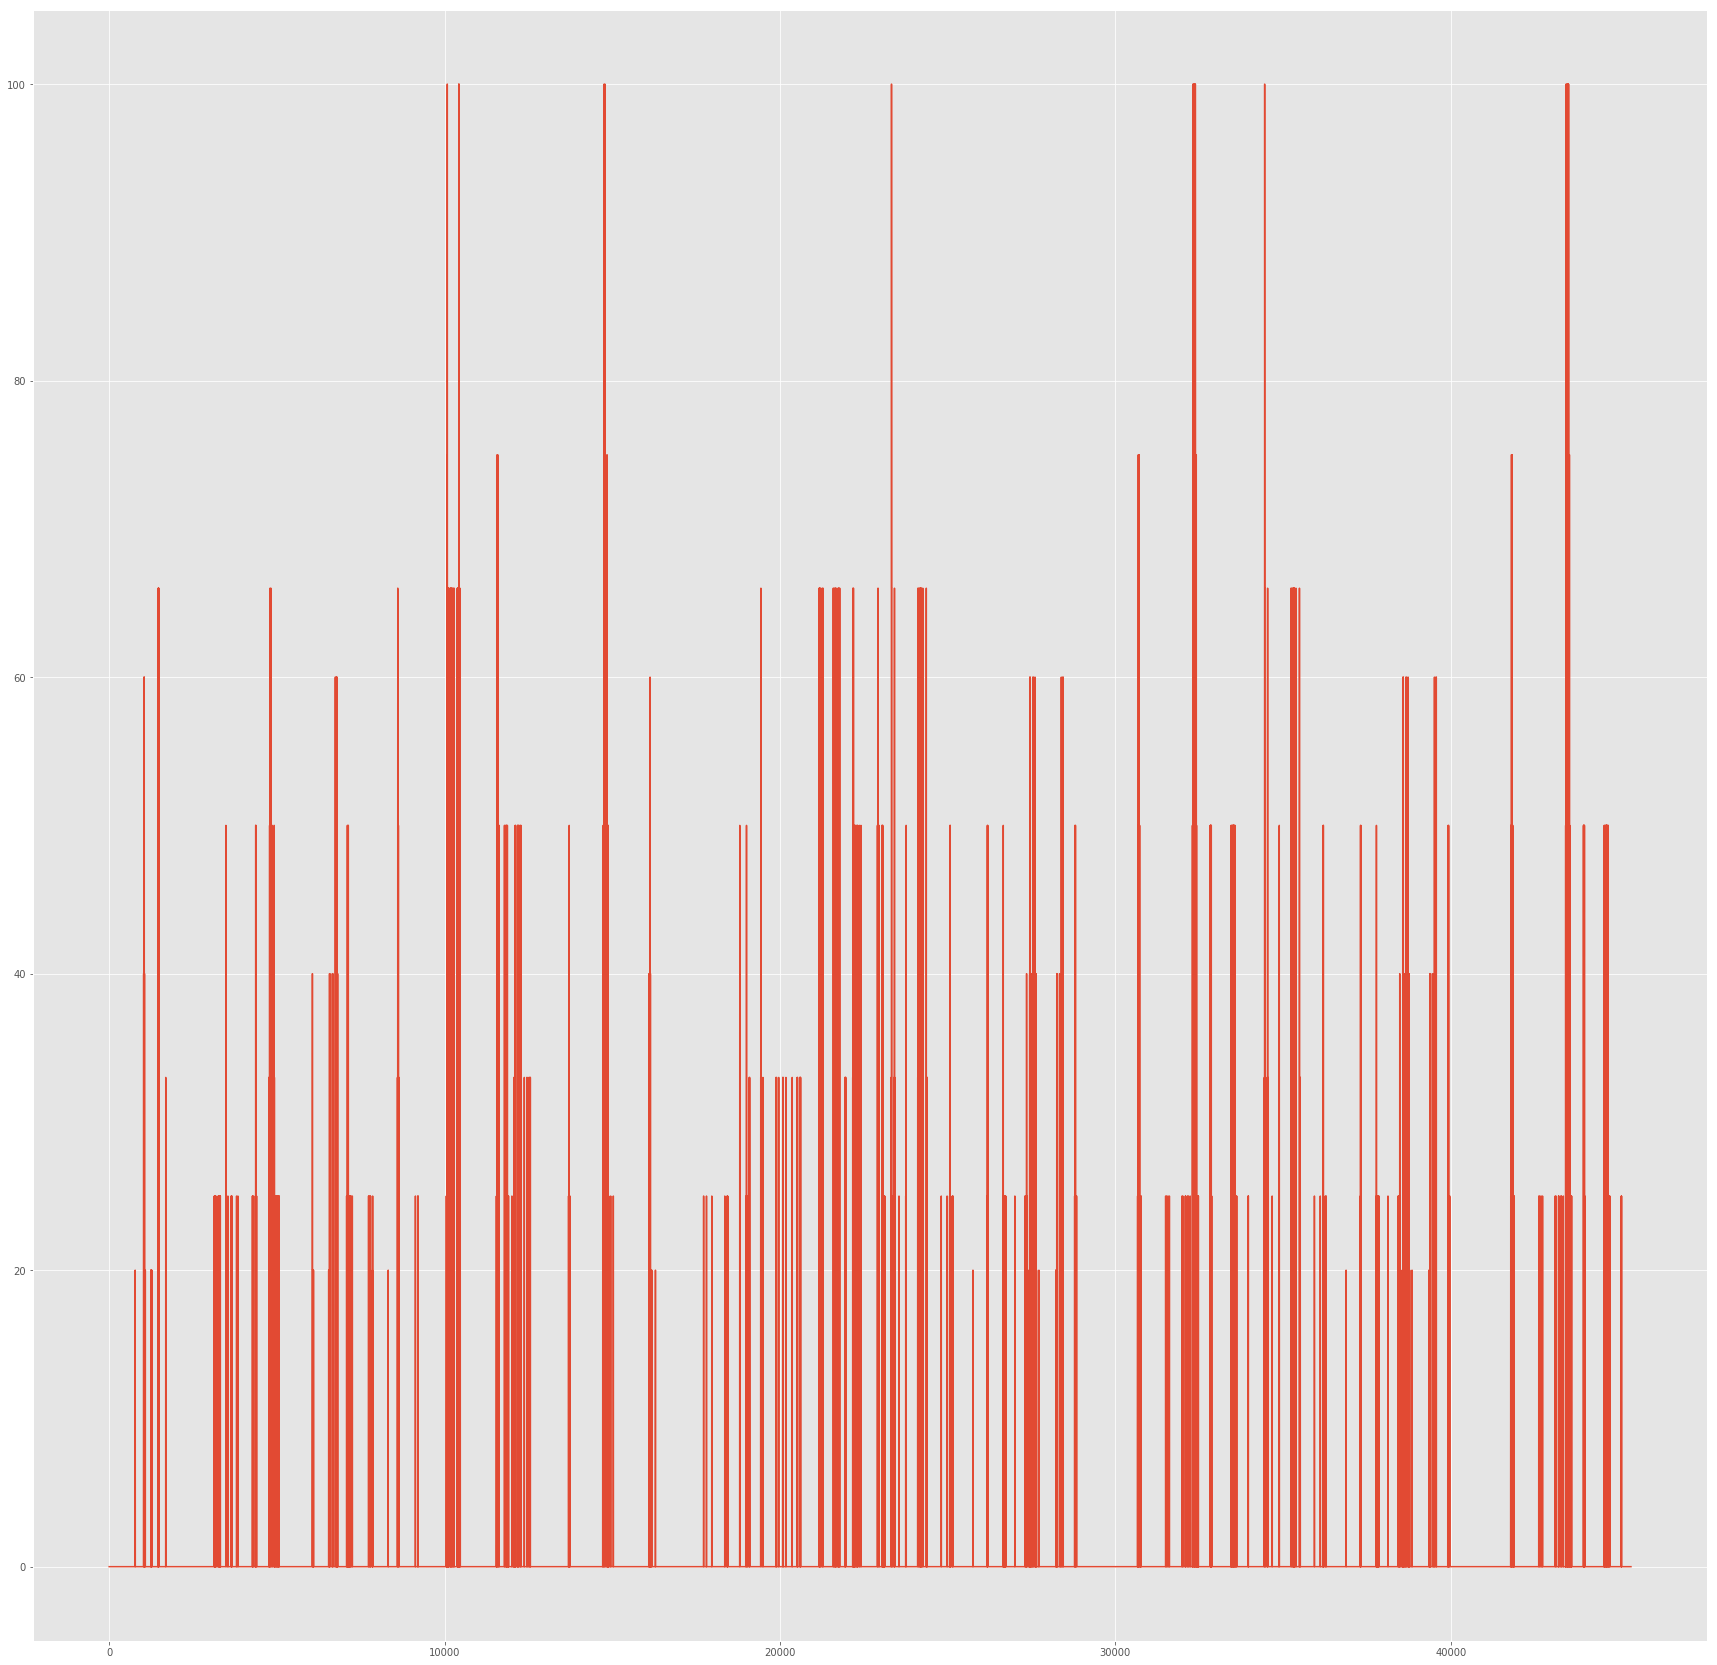

In [4]:
# On affiche le nuage de points ValueToPredict
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
plt.plot(df['ValueToPredict'])
plt.show()

# Statistiques

In [5]:
df.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var369,Var370,Var371,Var372,Var373,Var374,Var375,Var376,Var377,ValueToPredict
count,45376.000000,45376.000000,45376.000000,45376.000000,45376.000000,45376.000000,45376.000000,45376.000000,45376.000000,45376.000000,...,45376.000000,45376.000000,45376.000000,45376.000000,45376.000000,45376.000000,45376.000000,45376.000000,45376.000000,45376.000000
mean,0.905908,0.920553,92.910687,92.931789,93.518024,95.174250,98.073426,102.643101,113.840130,131.253357,...,0.489175,0.138702,0.176028,0.039911,0.334714,0.256986,0.234485,0.381149,0.193781,1.571227
std,0.197710,0.270439,60.708464,60.759543,61.556477,62.051099,63.614517,66.733980,63.091196,58.650334,...,0.513324,0.343582,0.365624,0.195752,0.471896,0.436976,0.423681,0.485674,0.395264,8.759445
min,0.000000,0.000000,-0.144050,-0.232642,-1.000000,-0.471523,-0.222361,-1.000000,-47.008100,-38.748200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.940531,1.000000,0.149665,0.109893,0.000000,0.000000,0.083476,0.000000,40.315850,127.508750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.972388,1.000000,117.142000,116.887500,117.962000,120.096500,124.328500,132.049000,141.488500,155.294500,...,0.254300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.984651,1.000000,139.717000,139.612500,140.570250,141.885250,146.290250,152.985250,160.443000,170.011250,...,1.000000,0.000000,0.045460,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,0.994108,1.000000,239.268000,236.523000,234.382000,232.527000,232.422000,236.293000,242.035000,248.668000,...,3.053000,4.536000,2.035000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


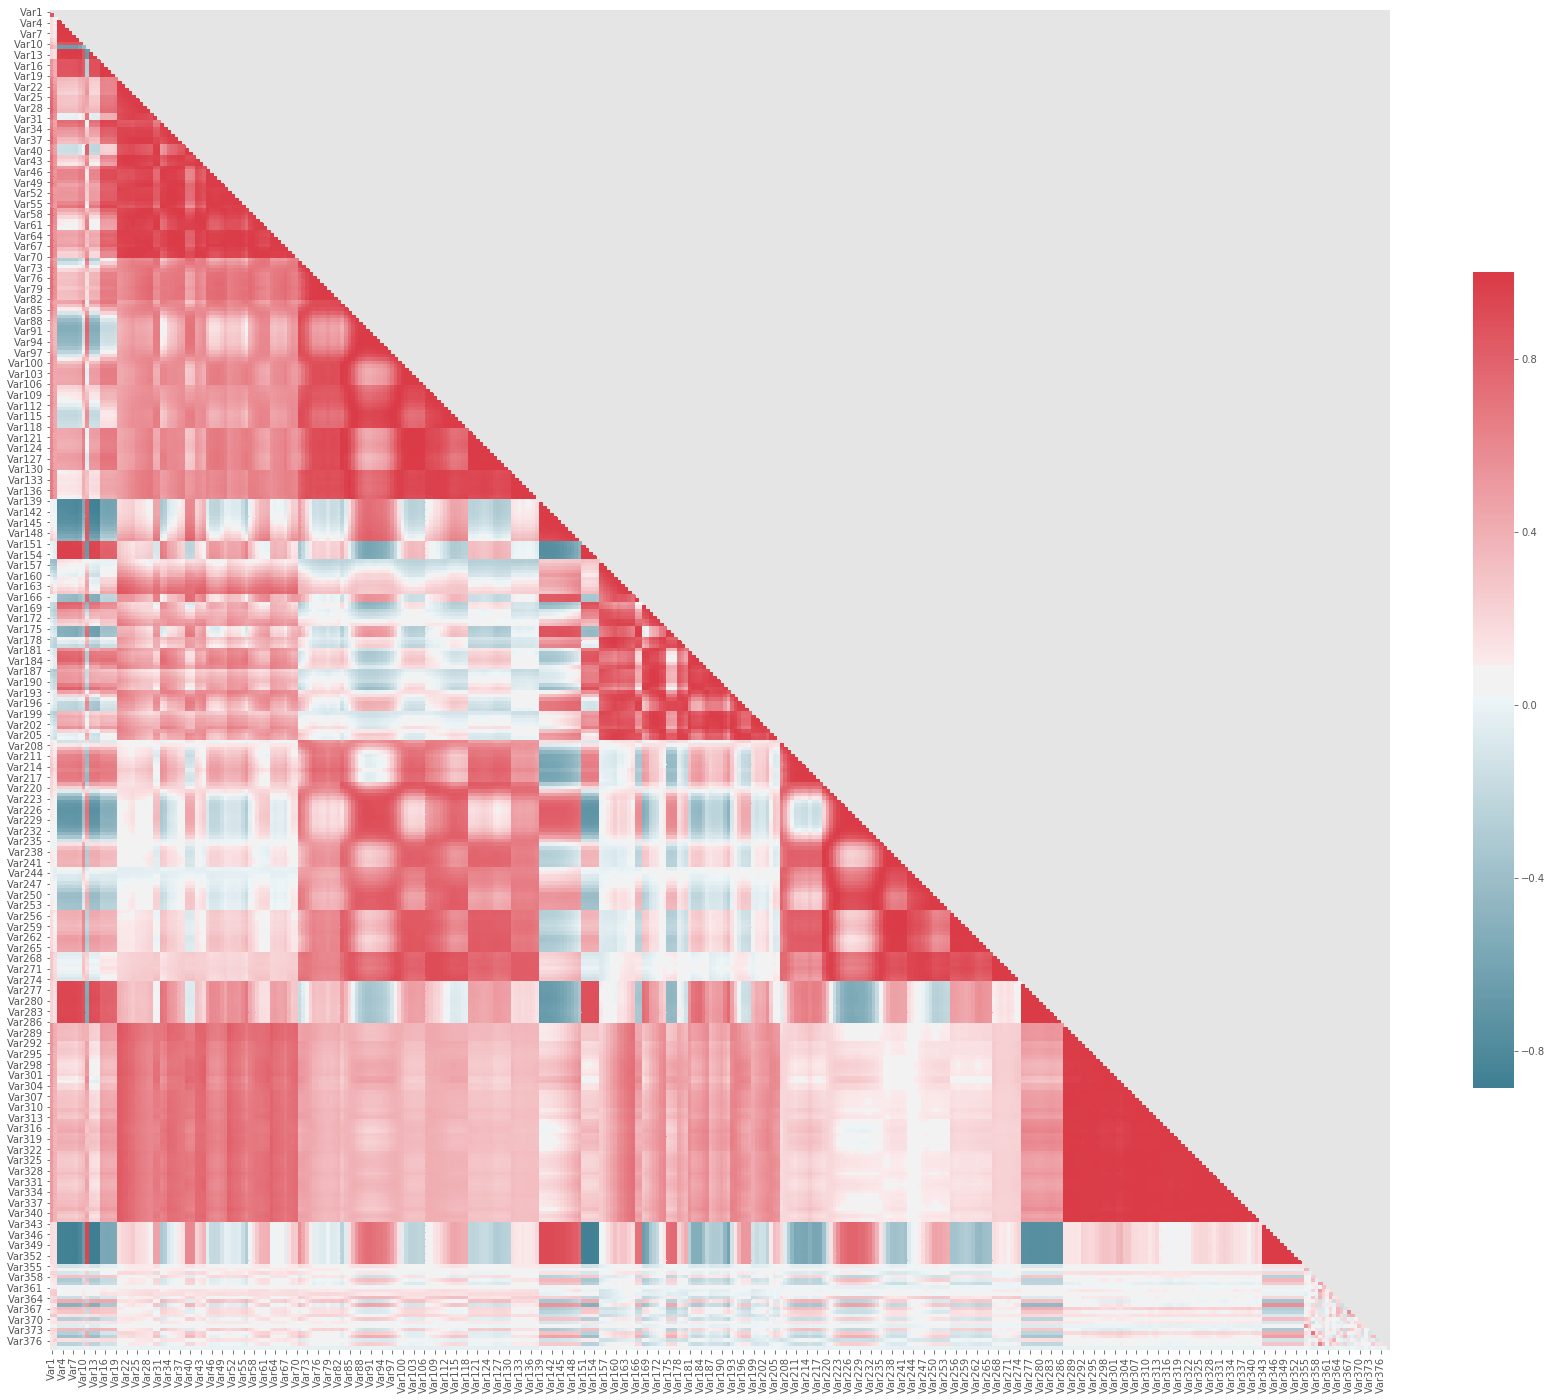

In [6]:
# Compute the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, 
            square=True, cbar_kws={"shrink": .5})

In [31]:
#comptage des valeurs
print('comptage des valeurs  ValueToPredict : ')
print('-------------------------------------- ')
print(df['ValueToPredict'].value_counts())

comptage des valeurs  ValueToPredict : 
-------------------------------------- 
0      43659
25       603
50       327
33       204
66       199
40       103
20        97
60        77
75        55
100       52
Name: ValueToPredict, dtype: int64


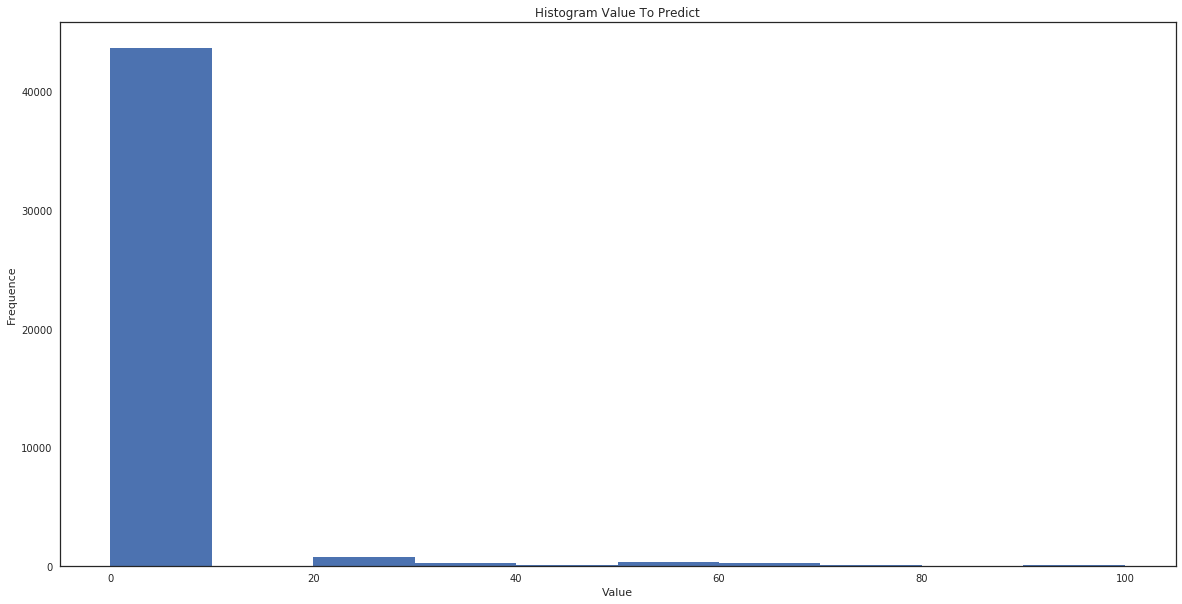

In [36]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# the histogram of the data
plt.hist(df['ValueToPredict'])
plt.title("Histogram Value To Predict")
plt.xlabel('Value')
plt.ylabel('Frequence')
plt.show()

In [45]:
# procedure de sur-echantinnage des valeurs Minoritaire 
# Filtre les classes minoritaire

c20=df[df.ValueToPredict == 20 ]   # 97
#c25=df[df.ValueToPredict == 25 ]   # 603
c50=df[df.ValueToPredict == 50 ]   # 327
c33=df[df.ValueToPredict == 33 ]   # 204
c66=df[df.ValueToPredict == 66 ]   # 199
c40=df[df.ValueToPredict == 40 ]   # 103
c60=df[df.ValueToPredict == 60 ]   # 77
c75=df[df.ValueToPredict == 75]    # 55
c100=df[df.ValueToPredict == 100]  # 52

# Préparation des classes Minoritaire
c20 = pd.concat([c20,c20,c20,c20,c20,c20], ignore_index=True)     # Classe 20 duppliquer en 6 fois 97 * 6 = 582
c60 = pd.concat([c60,c60,c60,c60,c60,c60,c60], ignore_index=True) # Classe 60 duppliquer en 7 fois 77 * 7 = 539
c75 = pd.concat([c75,c75,c75,c75,c75,c75,c75,c75,c75,c75], ignore_index=True) # Classe 75 duppliquer en 10 fois 55 * 10 =550
c100 = pd.concat([c100,c100,c100,c100,c100,c100,c100,c100,c100,c100], ignore_index=True) # Classe 100 duppliquer en 10 fois 52 * 10 = 520
c50 = pd.concat([c50,c50], ignore_index=True)  # Classe 50 duppliquer en 2 fois 327 * 2 = 654
c33 = pd.concat([c33,c33,c33], ignore_index=True)   # Classe 33 duppliquer en 3 fois 204 * 3 = 612
c66 = pd.concat([c66,c66,c66], ignore_index=True)   # Classe 66 duppliquer en 3 fois 199 * 3 = 597
c40 = pd.concat([c40,c40,c40,c40,c40,c40], ignore_index=True)   # Classe 40 duppliquer en 6 fois 103 * 6 = 618

In [46]:
c_ech = pd.concat([c20,c60,c75,c100,c50,c33,c40,c66], ignore_index=True)  #  (4672, 378)   # c_ech.shape
# Dataset apres sur-échantionnage 
df_ech = pd.concat([df, c_ech], ignore_index=True) # (45376 + 4672) = (50048, 378)

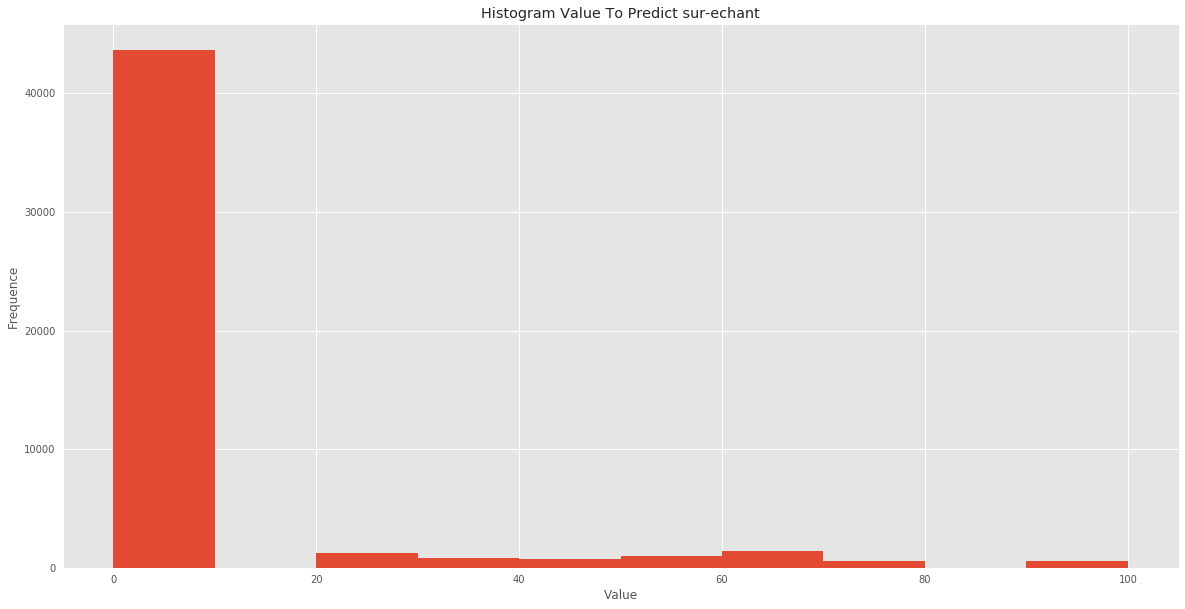

In [47]:
# statistique de la nouvelle dataset 
# the histogram of the data sur-échantionnage 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

plt.hist(df_ech['ValueToPredict'])
plt.title("Histogram Value To Predict sur-echant")
plt.xlabel('Value')
plt.ylabel('Frequence')
plt.show()

In [48]:
print(df_ech['ValueToPredict'].value_counts())  # statistique de la nouvelle dataset 

0      43659
50       981
33       816
66       796
40       721
20       679
60       616
75       605
25       603
100      572
Name: ValueToPredict, dtype: int64


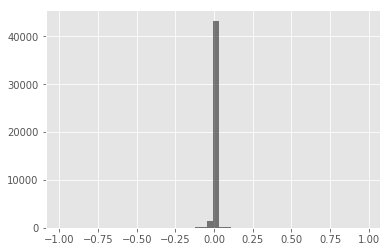

In [21]:
# Colonne  Var1
df['Var1'].diff().hist(color='k', alpha=0.5, bins=50)


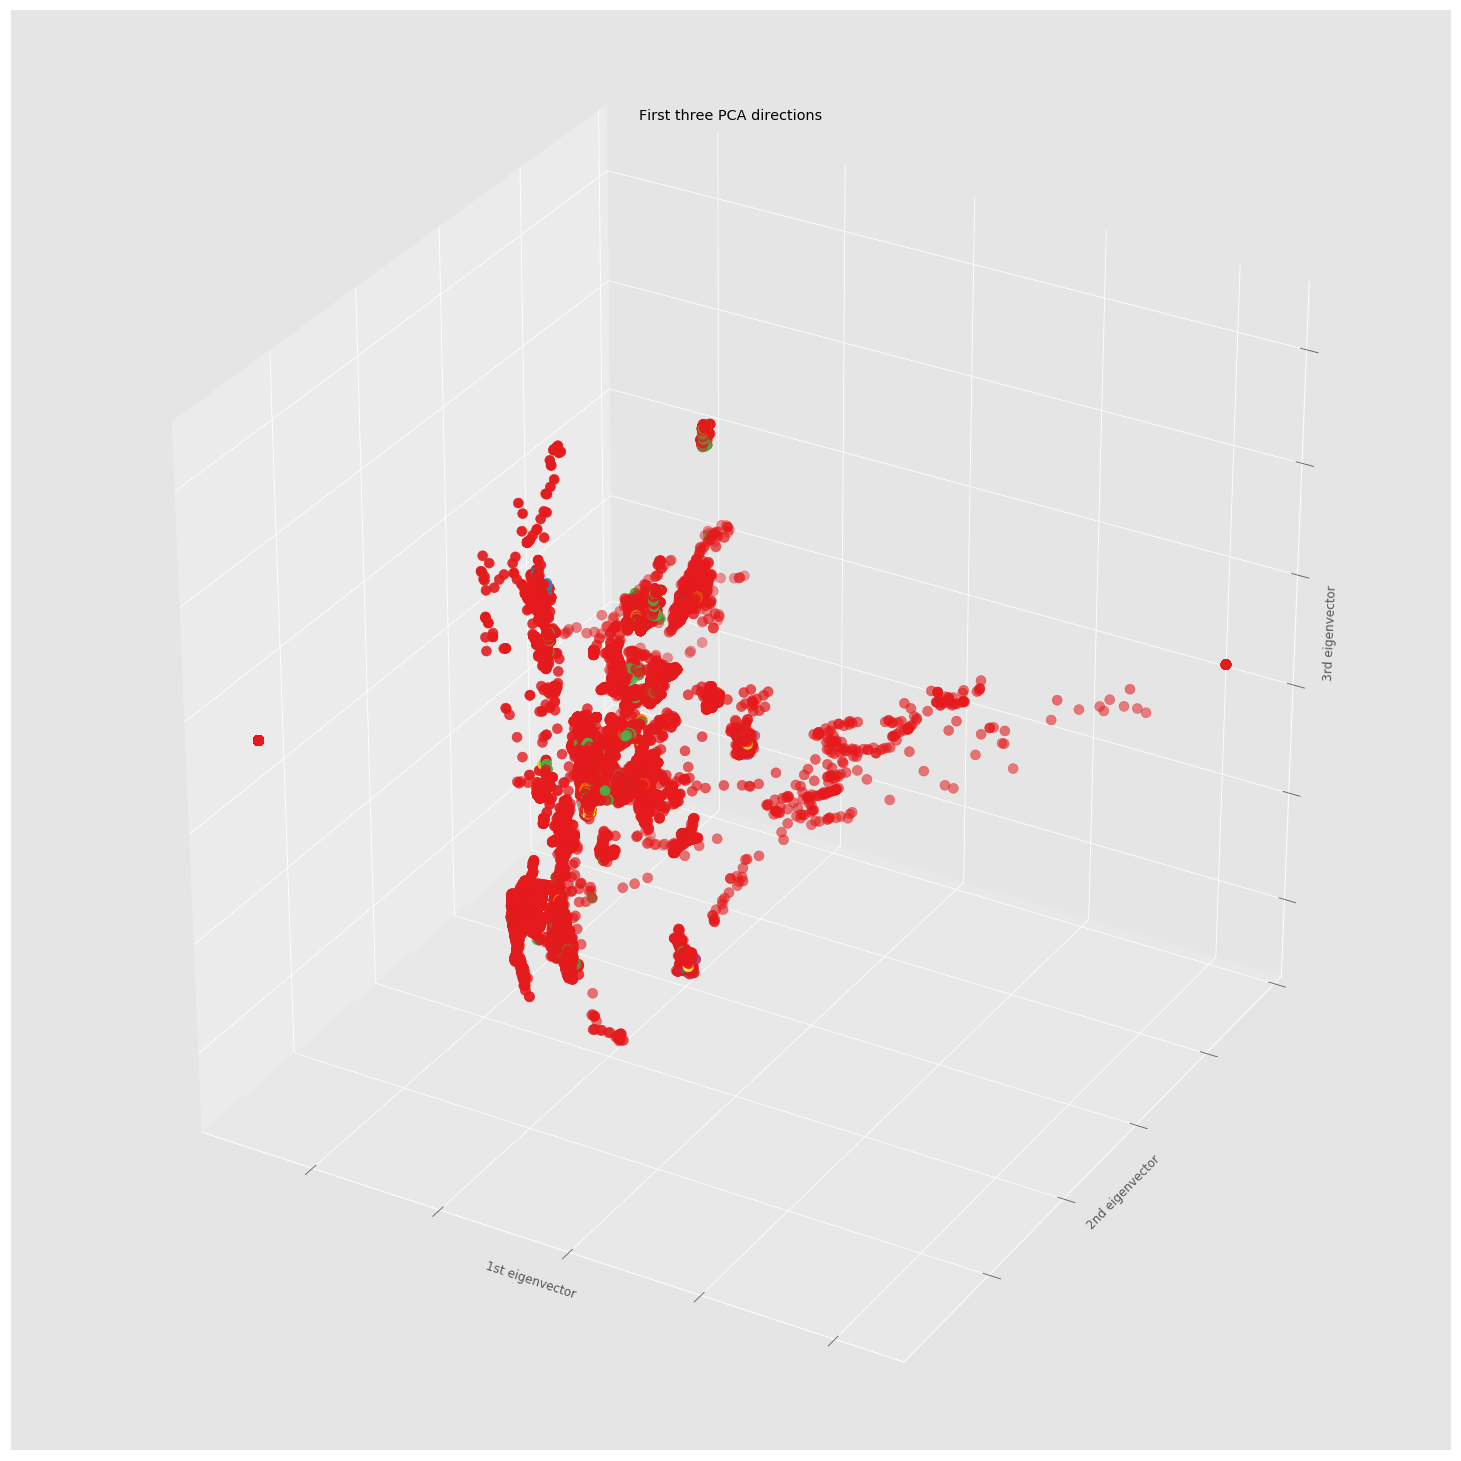

In [50]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
#dfa = pd.read_excel('videos.xlsx')
dfa = df.values

X = dfa[:,0:377]
y = dfa[:,377]


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

''' # Plot the training points
plt.scatter(X[:, 0], X[:, 50], c=y, cmap=plt.cm.Set1)
            #edgecolor='k')
plt.xlabel(' length')
plt.ylabel(' width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(()) '''

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(20, 20))
ax = Axes3D(fig)
X_reduced = PCA(n_components=377).fit_transform(dfa)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, s=100)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

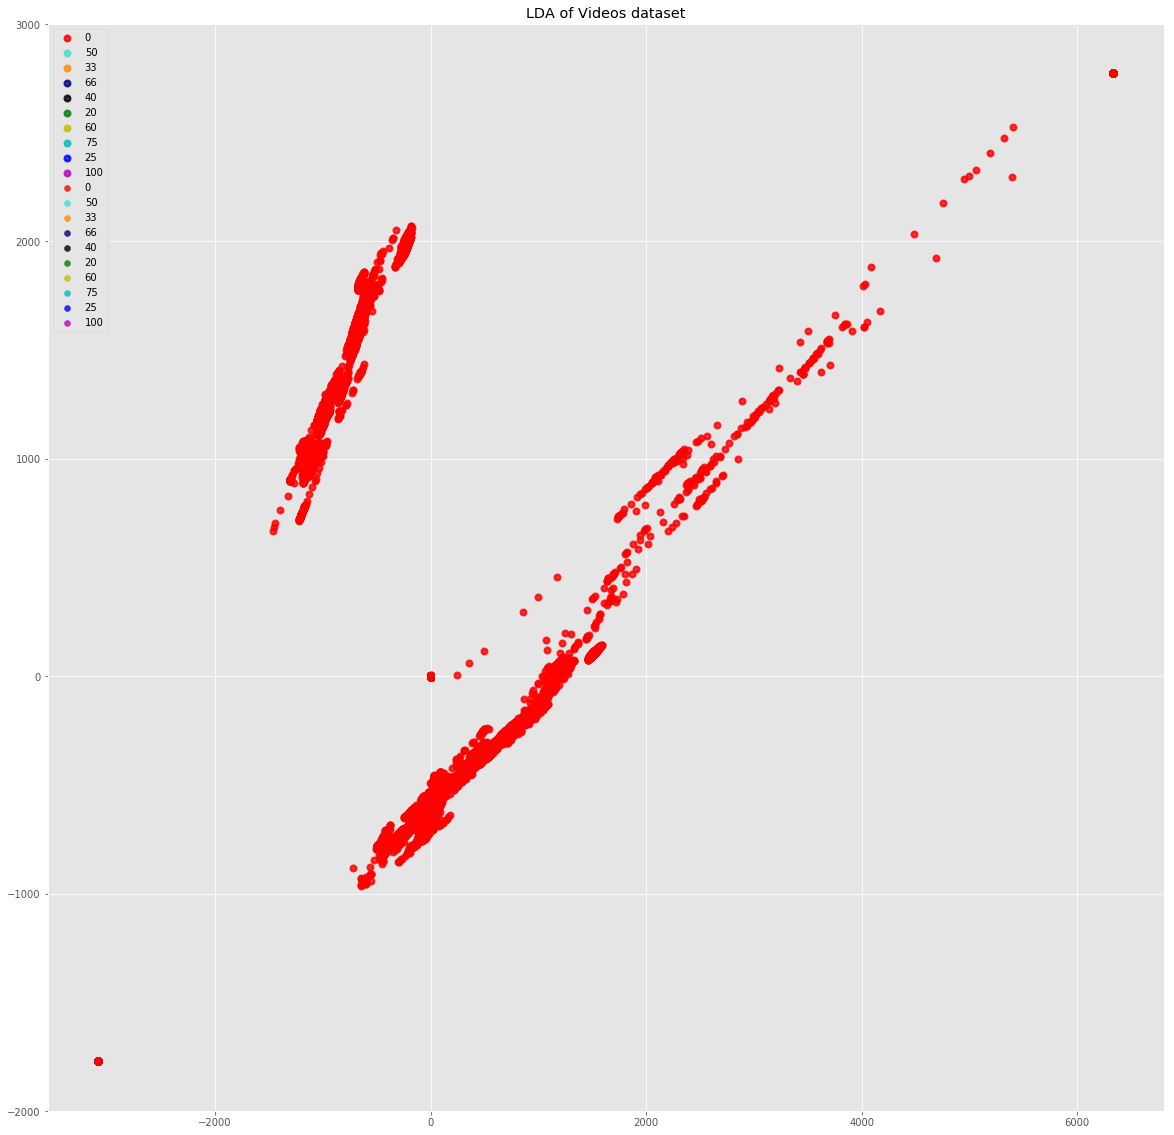

In [53]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


X = dfa[:,0:377]
y = dfa[:,377]

target_names =['0','50','33','66','40','20','60','75','25','100',]

pca = PCA(n_components=377)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=377)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
#print('explained variance ratio (first two components): %s'
      #% str(pca.explained_variance_ratio_))

fig = plt.figure(1, figsize=(20, 20))

colors = ['r', 'turquoise', 'darkorange','navy','k','g','y','c','b','m','aqua','violet']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2,3,4,5,6,7,8,9], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Videos dataset')

plt.show()

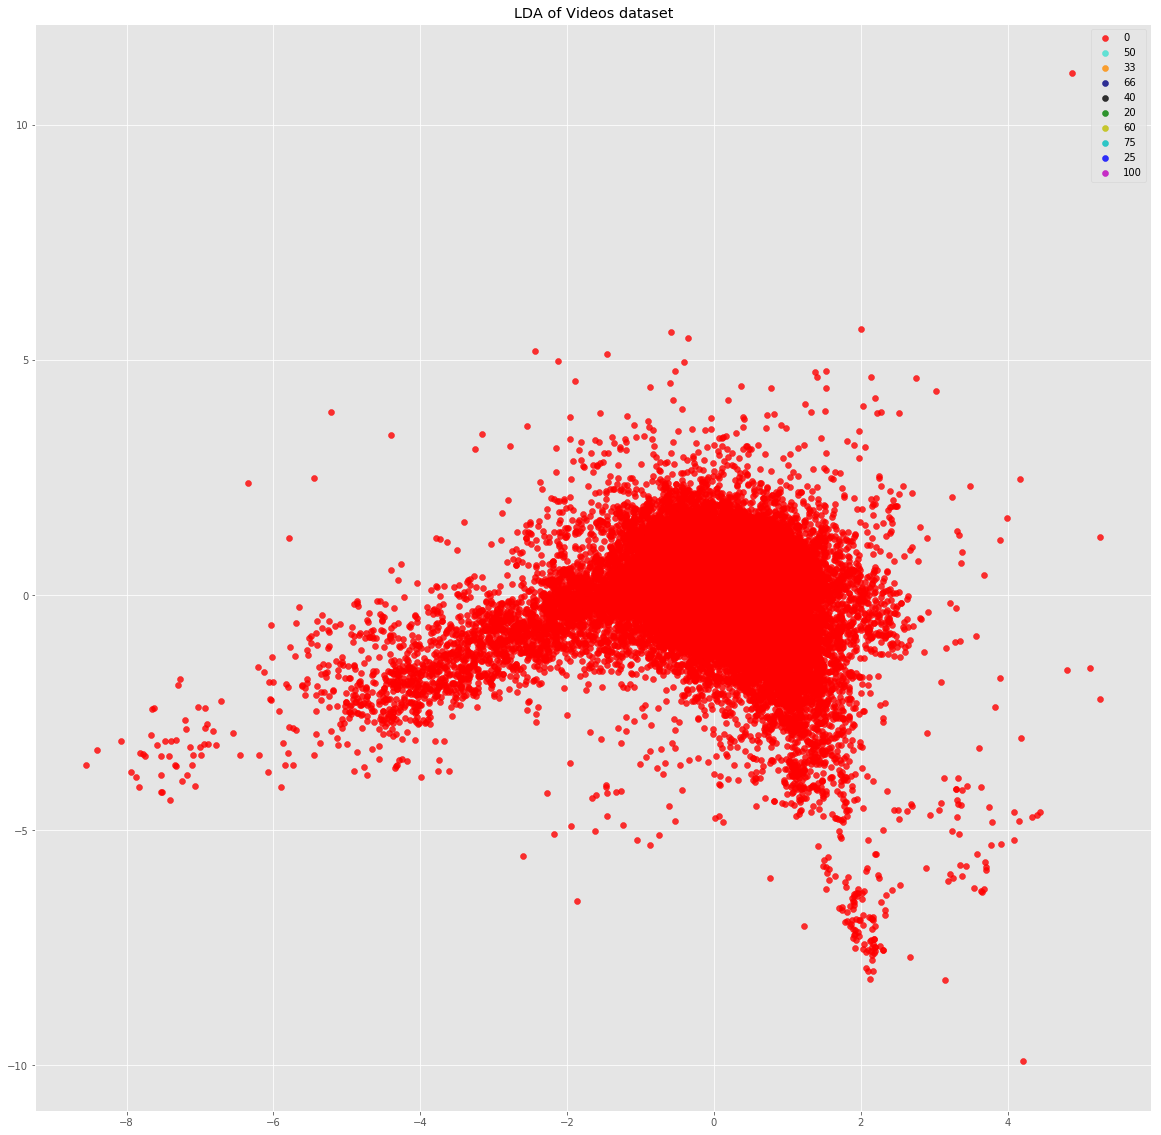

In [54]:
fig = plt.figure(1, figsize=(20, 20))
for color, i, target_name in zip(colors, [0, 1, 2,3,4,5,6,7,8,9], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Videos dataset')

plt.show()

In [110]:
# supprimer la valeur 0 
# pca sans ValueToPredict = 0 pour voir les autres classes
first = df.loc[df["ValueToPredict"] != 0]
#first

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var369,Var370,Var371,Var372,Var373,Var374,Var375,Var376,Var377,ValueToPredict
774,0.829134,1,93.6483,92.9999,93.5187,95.4282,99.9495,108.032,118.675,131.446,...,1.0,0.0,1.0,0,0,0,0,1,0,20
775,0.831350,1,93.6255,92.9801,93.5011,95.4092,99.9233,108.000,118.643,131.420,...,1.0,0.0,0.0,0,0,0,0,1,0,20
776,0.829960,1,93.6339,92.9806,93.4962,95.4034,99.9242,108.008,118.656,131.430,...,1.0,0.0,0.0,0,0,0,0,1,0,20
1024,0.823139,1,93.8175,93.2753,93.8521,95.7347,100.1410,108.117,118.781,131.634,...,1.0,0.0,0.0,0,0,0,0,1,0,20
1025,0.825291,1,94.0978,93.5045,94.0462,95.9073,100.3070,108.258,118.859,131.669,...,1.0,0.0,0.0,0,0,0,0,1,0,20
1026,0.819575,1,94.1348,93.5228,94.0489,95.9015,100.2930,108.248,118.843,131.654,...,1.0,0.0,0.0,0,0,0,0,1,0,20
1027,0.818753,1,94.1311,93.5131,94.0284,95.8672,100.2440,108.191,118.791,131.613,...,1.0,0.0,0.0,0,0,0,0,1,0,40
1028,0.824022,1,94.1708,93.4909,93.9418,95.7195,100.0640,108.022,118.685,131.590,...,1.0,0.0,0.0,0,0,0,0,1,0,40
1039,0.838968,1,94.3000,93.5759,93.9687,95.7380,100.1040,108.127,118.802,131.655,...,1.0,0.0,0.0,0,0,0,0,1,1,60
1040,0.833138,1,94.2327,93.5149,93.9649,95.7611,100.1050,108.070,118.705,131.588,...,1.0,0.0,0.0,0,0,0,0,1,1,60


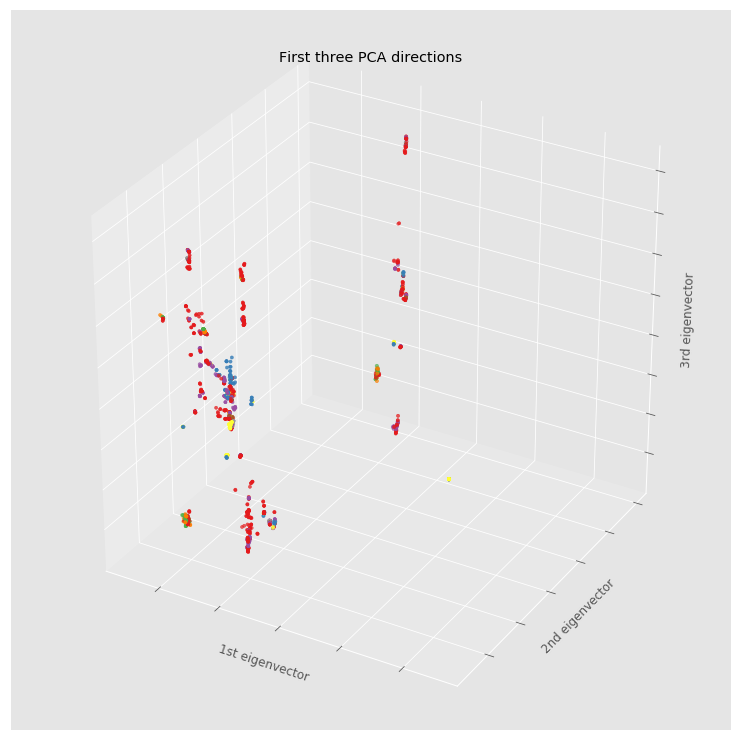

In [138]:
# PCA
X = f[:,0:377]
y = f[:,377]

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig)
X_reduced = PCA(n_components=377).fit_transform(f)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, s=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()